### Data Pre-processing

what is TFIDF 

TF-IDF stands for Term Frequency-Inverse Document Frequency, which is a widely used technique in Natural Language Processing (NLP) for measuring the importance of words in a text corpus.

TF-IDF takes into account two factors:

Term Frequency (TF): The number of times a term (word) appears in a document.

Inverse Document Frequency (IDF): A measure of how much information a term provides, based on how frequently it appears across all documents in the corpus.

The product of these two factors gives a numerical weight to each term in a document, with the idea being that the most important terms will have a higher weight. Specifically, the weight of a term in a document is proportional to its frequency in the document, and inversely proportional to its frequency across all documents in the corpus.

TF-IDF can be used for various NLP tasks such as information retrieval, text classification, and clustering. In information retrieval, for example, the TF-IDF score can be used to rank documents in response to a user query, with documents containing more relevant terms receiving higher scores.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/spam (1).tsv",sep='\t')

In [ ]:
## first five records
## individual meessage or ham or spam
### build model with binary classfication whehter message is spam or not
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
### is there any missing values or not
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
### last five rows of the dataset
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
### statistical analysis
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
### classfication stuff
#### how many ham or spam records are there
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
### how many percentage are coming under ham or spam
#### imbalanced data-set
df['label'].value_counts() / (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [ ]:
ham_data= df[df['label'] == 'ham']

In [ ]:
spam_data= df[df['label'] == 'spam']

In [ ]:
##how many rows and columns in ham or spam data set
ham_data.shape, spam_data.shape

((4825, 4), (747, 4))

In [ ]:
ham_data=ham_data.sample(spam_data.shape[0])

In [ ]:
ham_data.shape, spam_data.shape

((747, 4), (747, 4))

In [ ]:
ham_data.append(spam_data,ignore_index=True)

<ipython-input-14-b89c2a5873a8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ham_data.append(spam_data,ignore_index=True)


,label,message,length,punct
0,ham,Its like that hotel dusk game i think. You sol...,72,1
1,ham,All e best 4 ur exam later.,27,1
2,ham,Ok ill tell the company,23,0
3,ham,I didnt get anything da,23,0
4,ham,Horrible bf... I now v hungry...,32,6
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [ ]:
data= ham_data.append(spam_data,ignore_index=True)

<ipython-input-15-73563448cd79>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data= ham_data.append(spam_data,ignore_index=True)


In [ ]:
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [ ]:
### different features 
data.head()

,label,message,length,punct
0,ham,Its like that hotel dusk game i think. You sol...,72,1
1,ham,All e best 4 ur exam later.,27,1
2,ham,Ok ill tell the company,23,0
3,ham,I didnt get anything da,23,0
4,ham,Horrible bf... I now v hungry...,32,6


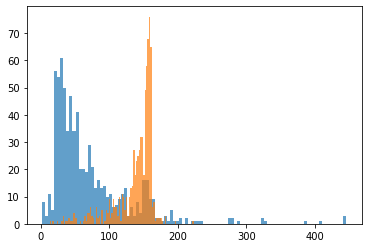

In [ ]:
### visualization of data ham with data column length
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

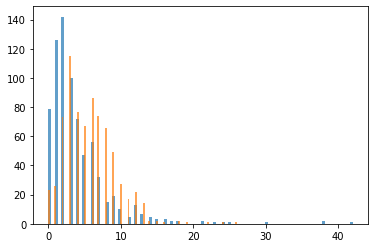

In [ ]:
### visualization of data ham with data column punct
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

#### Building Model ( Random Forest )

In [ ]:
### seprate your data in two different bucket
### you just segerate your data. your testing dataset
### how good accurate our model
data

,label,message,length,punct
0,ham,Its like that hotel dusk game i think. You sol...,72,1
1,ham,All e best 4 ur exam later.,27,1
2,ham,Ok ill tell the company,23,0
3,ham,I didnt get anything da,23,0
4,ham,Horrible bf... I now v hungry...,32,6
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [ ]:
####import train test split from model selection
from sklearn.model_selection import train_test_split

In [ ]:
###split the data into X_train and Y_test
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
### how many records are training ouput label
X_train.shape,X_test.shape

((1045,), (449,))

In [ ]:
y_train.shape,y_test.shape

((1045,), (449,))

#### Random Forest Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
#classifier =Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])
classifier =Pipeline([("tfidf", TfidfVectorizer()),("classifier", RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

#### Predicting the result Random Forest

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#model has predicted good score 
accuracy_score(y_test,y_pred)

0.9443207126948775

In [ ]:
##model prediction is good, accurate model score
0.9487750556792873 * 449

426.0

In [ ]:
### two cross two metrics
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 23, 199]])

In [ ]:
### classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



#### Building SVM (support vector Machine)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100, gamma='auto'))])

In [ ]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

#### Predicting the result(SVM)

In [ ]:
### get the svm predict report
y_pred=svm.predict(X_test)

In [ ]:
###find the accuracy score
accuracy_score(y_test,y_pred)

0.955456570155902

In [ ]:
###find out the confusion matrix report
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 18, 204]])

In [ ]:
###print the classification report for SVM
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [ ]:
#### now create our test data
test1=["Hello,You are learning natural Language Processing"]
test2=["Hope you are doing good and learning new things"]
test3=["Congratulations!!!, you won a lottery ticket worth $1 Million! To Claim call 5444444 "]
test4=["You have received a scholarship fund!!!"]

In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['ham']
['spam']
['ham']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))
print(svm.predict(test4))

['ham']
['ham']
['spam']
['ham']
